 На двух переменных из п2 вычислить квадратичную разделяющую функцию непосредственно по оценкам ковариационных матриц и средних (самостоятельно реализовать метод, не используя готовый). Визуализировать её и сравнить с решением из п2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB

In [2]:
def make_meshgrid(x, y, d, h=.02):
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out, Z


In [3]:
iris = datasets.load_iris()
iris_frame = pd.DataFrame(iris.data,columns = iris.feature_names)
iris_frame['target'] = iris['target']
iris_frame = iris_frame[50:150]

iris_frame['name'] = iris_frame['target'].map(lambda x : iris['target_names'][x])
iris_frame


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [4]:
class QDA:
    def fit(self, X, t):
        self.priors = dict()
        self.means = dict()
        self.covs = dict()

        self.classes = np.unique(t)

        for c in self.classes:
            X_c = X[t == c]
            self.priors[c] = X_c.shape[0] / X.shape[0]
            self.means[c] = np.mean(X_c, axis=0)
            self.covs[c] = np.cov(X_c.astype(float), rowvar=False)

    def predict(self, X):
        preds = []
        for x in X:
            posts = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                inv_cov = np.linalg.inv(self.covs[c])
                inv_cov_det = np.linalg.det(inv_cov)
                diff = x-self.means[c]
                likelihood = 0.5*np.log(inv_cov_det) - 0.5*diff.T @ inv_cov @ diff
                post = prior + likelihood
                posts.append(post)
            pred = self.classes[np.argmax(posts)]
            preds.append(pred)
        return np.array(preds)

Text(0, 0.5, 'petal width (cm)')

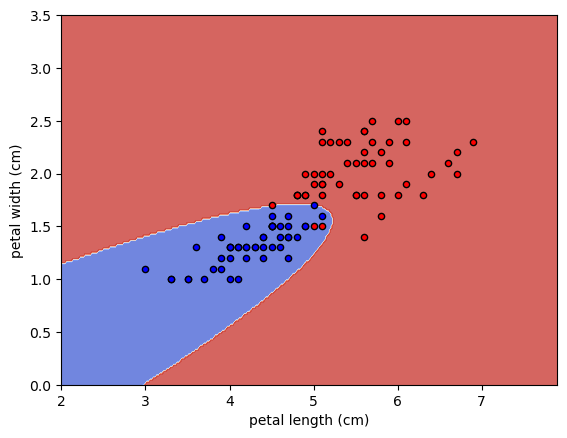

In [6]:
data = iris_frame.to_numpy()

X = data[:, 2:4]
#print(X)
t = data[:, 4]
#print(t)
Y = iris_frame['target'].values
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
qda = QDA()
qda.fit(X, t)
preds = qda.predict(X)

fig, ax = plt.subplots(1, 1)
plt.subplots_adjust(wspace=0.1, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
d = 5
xx, yy = make_meshgrid(X0, X1,d)

_, Z = plot_contours(ax, qda, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)

for i in range(len(Y)):
    if Y[i] == preds[i] and Y[i] == 1:
        clr = 'b'
    else: clr = 'r'
    ax.scatter(X0[i], X1[i], c=clr, s=20, edgecolors='black')

ax.set_xlim(X0.min()-1, X0.max()+1)
ax.set_ylim(X1.min()-1, X1.max()+1)
ax.set_xlabel(features[2])
ax.set_ylabel(features[3])